In [40]:
import pandas as pd
import numpy as np

from sklearn import cluster
import matplotlib.pyplot as plt

%matplotlib inline

In [19]:
df = pd.read_csv("/data/iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [20]:
features = ["SepalLengthCm", "PetalLengthCm"]

In [21]:
X = df[features].values
X = X - np.mean(X, axis=0)
X = X/np.std(X, axis=0)

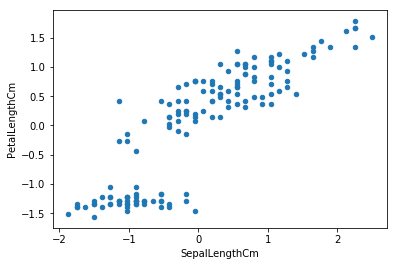

In [22]:
pd.DataFrame(X, columns=features).plot.scatter(0, 1)

In [26]:
kmeans = cluster.KMeans(n_clusters=3, random_state=1, n_jobs=2)
y = kmeans.fit_predict(X)

In [27]:
pd.Series(y).value_counts()

1    54
2    53
0    43
dtype: int64

In [34]:
import seaborn as sns

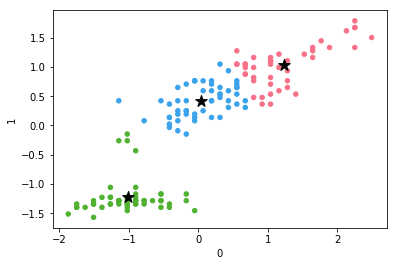

In [46]:
_, ax = plt.subplots()
colors = [sns.color_palette("husl", n_colors=3)[k] for k in y]
pd.DataFrame(X, columns=features).plot.scatter(0, 1, color = colors, ax = ax)
pd.DataFrame(kmeans.cluster_centers_).plot.scatter(0, 1, ax = ax, marker = "*", s = 150, color = "black")

In [47]:
distances = np.zeros([len(y)])
for i, k in enumerate(np.unique(y)):
    X_k = X[y == k]
    centroid = kmeans.cluster_centers_[i]
    distances[y == k] = np.sqrt(np.sum((X_k - centroid) ** 2, axis=1))


In [49]:
clusters = pd.DataFrame({"cluster": y, "distance": distances})
clusters.head()

,cluster,distance
0,1,0.160599
1,1,0.170454
2,1,0.407209
3,1,0.494562
4,1,0.112879


In [50]:
clusters.groupby("cluster").distance.mean()

cluster
0    0.558198
1    0.402361
2    0.435640
Name: distance, dtype: float64

In [55]:
outliers = {}
for k in np.unique(y):
    outliers[k] = clusters[clusters.cluster == k].sort_values("distance", ascending = False).iloc[:3, :].index

In [54]:
outliers

{0: Int64Index([131, 118, 117], dtype='int64'),
 1: Int64Index([60, 14, 57], dtype='int64'),
 2: Int64Index([106, 59, 134], dtype='int64')}

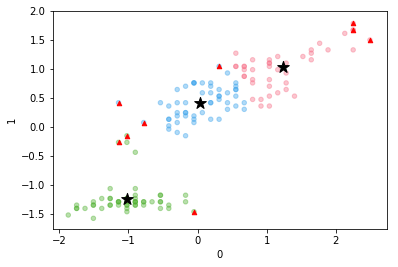

In [62]:
_, ax = plt.subplots()
colors = [sns.color_palette("husl", n_colors=3)[k] for k in y]
pd.DataFrame(X, columns=features).plot.scatter(0, 1, color = colors, ax = ax, alpha = 0.4)
pd.DataFrame(kmeans.cluster_centers_).plot.scatter(0, 1, ax = ax, marker = "*", s = 150, color = "black")


for k in outliers:
    a = outliers[k]
    pd.DataFrame(X[a]).plot.scatter(0, 1, color = "red", ax = ax, marker = "^")


In [66]:
0.99 ** 1000

4.317124741065786e-05

In [68]:
import skimage as ski
import skimage.io

In [69]:
img = ski.io.imread("/Users/abulbasar/Downloads/face.jpg")

In [70]:
img.shape

(466, 700, 3)

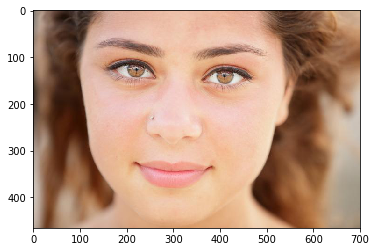

In [71]:
plt.imshow(img)

In [76]:
img2d = img.reshape(-1, 3)
img2d = (img2d - img2d.mean(axis = 0))/img2d.std(axis = 0)
img2d.shape

(326200, 3)

In [77]:
pd.DataFrame(img2d).describe()

,0,1,2
count,3.262000e+05,3.262000e+05,3.262000e+05
mean,1.935619e-14,-3.724425e-15,2.819055e-15
std,1.000002e+00,1.000002e+00,1.000002e+00
min,-3.184911e+00,-2.539729e+00,-2.100750e+00
25%,-7.753720e-01,-8.652688e-01,-9.584639e-01
50%,4.208532e-01,4.037960e-01,3.419844e-01
75%,8.822543e-01,8.444435e-01,8.164723e-01
max,1.172766e+00,1.725738e+00,2.152068e+00


In [78]:
kmeans = cluster.MiniBatchKMeans(n_clusters=5, random_state=1)
y = kmeans.fit_predict(img2d)

In [79]:
y.shape

(326200,)

In [82]:
img.shape[:-1]

(466, 700)

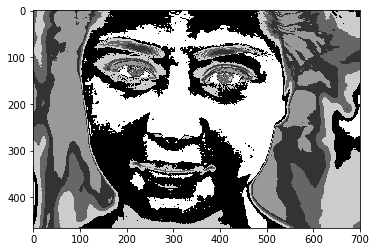

In [93]:
kmeans = cluster.MiniBatchKMeans(n_clusters=6, random_state=1)
y = kmeans.fit_predict(img2d)
plt.imshow(y.reshape(img.shape[:-1]), cmap="gray")

In [90]:
scores = {}
for k in range(2, 20):
    kmeans = cluster.MiniBatchKMeans(n_clusters=k, random_state=1).fit(img2d)
    scores[k] = kmeans.inertia_

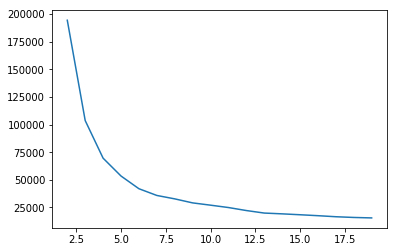

In [91]:
pd.Series(scores).plot()